# Daler Kurbanov, d.kurbanov@innopolis.university

# Importing libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
import warnings
import csv
import pandas as pd

warnings.filterwarnings("ignore")

# 2 Linear/Polynomial Regression


## 2.1 Practical Task 1 [25%

In [ ]:
SAMPLES = 50
rnd = np.random.RandomState(42)
X = rnd.rand(SAMPLES) * 16
Y = np.sin(X)*np.sqrt(X) + 0.8 * rnd.randn(SAMPLES)

### Plotting the original data

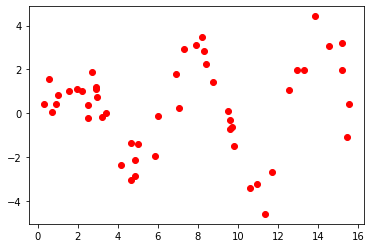

In [ ]:
plt.plot(X, Y, 'ro')

### Resizing the shape of the original data in order to apply linear regression

In [ ]:
x = np.reshape(X, (X.size, 1))
y = np.reshape(Y, (Y.size, 1))
print(x.shape)
print(y.shape)

(50, 1)
(50, 1)


### Applying linear regression on the data

In [ ]:
linearReg = LinearRegression()
linearReg.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
x_test = np.linspace(0, 20)
x_test = np.reshape(x_test, (x_test.size, 1))

### Creating model prediction from the test data

In [ ]:
y_pred = linearReg.predict(x_test)

### Plotting the predicted line. It is underfitted due to the low polynomial(1)

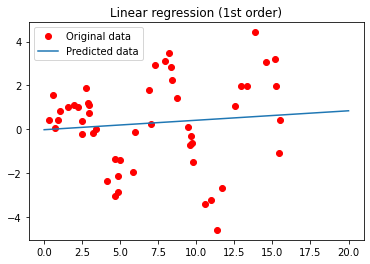

In [ ]:
plt.plot(X, Y, 'ro', label = 'Original data')
plt.plot(x_test, y_pred, label = 'Predicted data')
plt.legend(loc = 'best')
plt.title('Linear regression (1st order)')
plt.show()

### Tuning the most suitable polynomial degree for our linear regression.

In [ ]:
def PolynomialRegression(degree = 1, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

In [ ]:
param_grid = {'polynomialfeatures__degree': np.arange(1, 15)}
grid_search_clf = GridSearchCV(PolynomialRegression(), param_grid, scoring='neg_mean_squared_error')

In [ ]:
grid_search_clf.fit(x, y)

means = grid_search_clf.cv_results_['mean_test_score']
stds = grid_search_clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_search_clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
        % (mean, std * 2, params))
print()
print("Best parameters set found on development set:")
print()
print(grid_search_clf.best_params_)
best_degree = grid_search_clf.best_params_['polynomialfeatures__degree']

-4.053 (+/-2.313) for {'polynomialfeatures__degree': 1}
-3.946 (+/-1.799) for {'polynomialfeatures__degree': 2}
-4.139 (+/-2.117) for {'polynomialfeatures__degree': 3}
-4.278 (+/-1.647) for {'polynomialfeatures__degree': 4}
-4.396 (+/-1.554) for {'polynomialfeatures__degree': 5}
-2.077 (+/-1.116) for {'polynomialfeatures__degree': 6}
-1.931 (+/-1.031) for {'polynomialfeatures__degree': 7}
-1.043 (+/-0.574) for {'polynomialfeatures__degree': 8}
-1.022 (+/-0.586) for {'polynomialfeatures__degree': 9}
-0.811 (+/-0.541) for {'polynomialfeatures__degree': 10}
-1.191 (+/-1.464) for {'polynomialfeatures__degree': 11}
-1.063 (+/-0.970) for {'polynomialfeatures__degree': 12}
-1.044 (+/-0.788) for {'polynomialfeatures__degree': 13}
-1.242 (+/-0.792) for {'polynomialfeatures__degree': 14}

Best parameters set found on development set:

{'polynomialfeatures__degree': 10}


It appears that 10 is the best polynomial to choose. If we were to choose higher polynomial, our model would have higher error. Therefore, choosing higher polynomial would only hurt our predictions. 

### Tuning the Ridge(L2) Regression

In [ ]:
def PolynomialRegressionRidge(degree = 1, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), Ridge(**kwargs))

In [ ]:
param_grid = [{'ridge__alpha' : np.arange(0.1, 2, 0.05)}]
grid_search_clf = GridSearchCV(PolynomialRegressionRidge(best_degree), param_grid, scoring='neg_mean_squared_error')

In [ ]:
grid_search_clf.fit(x, y)

means = grid_search_clf.cv_results_['mean_test_score']
stds = grid_search_clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_search_clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
        % (mean, std * 2, params))
print()
print("Best parameters set found on development set:")
print()
print(grid_search_clf.best_params_)
best_ridge_alpha = grid_search_clf.best_params_['ridge__alpha']

-0.817 (+/-0.432) for {'ridge__alpha': 0.1}
-0.822 (+/-0.431) for {'ridge__alpha': 0.15000000000000002}
-0.827 (+/-0.431) for {'ridge__alpha': 0.20000000000000004}
-0.831 (+/-0.432) for {'ridge__alpha': 0.25000000000000006}
-0.834 (+/-0.434) for {'ridge__alpha': 0.30000000000000004}
-0.837 (+/-0.436) for {'ridge__alpha': 0.3500000000000001}
-0.840 (+/-0.438) for {'ridge__alpha': 0.40000000000000013}
-0.842 (+/-0.441) for {'ridge__alpha': 0.45000000000000007}
-0.844 (+/-0.443) for {'ridge__alpha': 0.5000000000000001}
-0.845 (+/-0.445) for {'ridge__alpha': 0.5500000000000002}
-0.846 (+/-0.447) for {'ridge__alpha': 0.6000000000000002}
-0.847 (+/-0.450) for {'ridge__alpha': 0.6500000000000001}
-0.849 (+/-0.452) for {'ridge__alpha': 0.7000000000000002}
-0.850 (+/-0.454) for {'ridge__alpha': 0.7500000000000002}
-0.850 (+/-0.456) for {'ridge__alpha': 0.8000000000000002}
-0.851 (+/-0.458) for {'ridge__alpha': 0.8500000000000002}
-0.852 (+/-0.461) for {'ridge__alpha': 0.9000000000000002}
-0.853

### Tuning the Lasso(L1) regression

In [ ]:
def PolynomialRegressionLasso(degree = 1, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), Lasso(**kwargs))

In [ ]:
param_grid = [{'lasso__alpha' : np.arange(0.1, 2, 0.05)}]
grid_search_clf = GridSearchCV(PolynomialRegressionLasso(best_degree), param_grid, scoring='neg_mean_squared_error')

In [ ]:
grid_search_clf.fit(x, y)

means = grid_search_clf.cv_results_['mean_test_score']
stds = grid_search_clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_search_clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
        % (mean, std * 2, params))
print()
print("Best parameters set found on development set:")
print()
print(grid_search_clf.best_params_)
best_lasso_alpha = grid_search_clf.best_params_['lasso__alpha']

-4.033 (+/-2.012) for {'lasso__alpha': 0.1}
-4.034 (+/-2.016) for {'lasso__alpha': 0.15000000000000002}
-4.034 (+/-2.021) for {'lasso__alpha': 0.20000000000000004}
-4.035 (+/-2.025) for {'lasso__alpha': 0.25000000000000006}
-4.036 (+/-2.030) for {'lasso__alpha': 0.30000000000000004}
-4.037 (+/-2.035) for {'lasso__alpha': 0.3500000000000001}
-4.038 (+/-2.039) for {'lasso__alpha': 0.40000000000000013}
-4.038 (+/-2.044) for {'lasso__alpha': 0.45000000000000007}
-4.039 (+/-2.049) for {'lasso__alpha': 0.5000000000000001}
-4.040 (+/-2.054) for {'lasso__alpha': 0.5500000000000002}
-4.041 (+/-2.058) for {'lasso__alpha': 0.6000000000000002}
-4.042 (+/-2.063) for {'lasso__alpha': 0.6500000000000001}
-4.043 (+/-2.068) for {'lasso__alpha': 0.7000000000000002}
-4.044 (+/-2.073) for {'lasso__alpha': 0.7500000000000002}
-4.045 (+/-2.078) for {'lasso__alpha': 0.8000000000000002}
-4.046 (+/-2.082) for {'lasso__alpha': 0.8500000000000002}
-4.047 (+/-2.087) for {'lasso__alpha': 0.9000000000000002}
-4.048

### Plotting the models' predictions

In [ ]:
polynomialReg = make_pipeline(PolynomialFeatures(best_degree), LinearRegression())
y_pred = polynomialReg.fit(x, y).predict(x_test)

polynomialRegRidge = make_pipeline(PolynomialFeatures(best_degree),Ridge(best_ridge_alpha))
y_pred_ridge = polynomialRegRidge.fit(x, y).predict(x_test)

polynomialRegLasso =  make_pipeline(PolynomialFeatures(best_degree), Lasso(best_lasso_alpha))
y_pred_lasso = polynomialRegLasso.fit(x, y).predict(x_test)


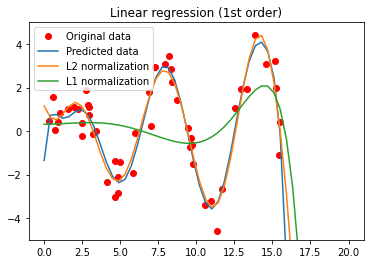

In [ ]:
plt.plot(X, Y, 'ro', label = 'Original data')
plt.plot(x_test, y_pred, label = 'Predicted data')
plt.plot(x_test, y_pred_ridge, label = 'L2 normalization')
plt.plot(x_test, y_pred_lasso, label = 'L1 normalization')
plt.ylim(-5, 5)
plt.legend(loc = 'best')
plt.title('Linear regression (1st order)')
plt.show()

### Evaluating models

In [ ]:

models = [(linearReg, 'Linear Regression'), 
          (polynomialReg, 'Polynomial Regression'), 
          (polynomialRegLasso, 'Polynomial Regression with L1 normalization'), 
          (polynomialRegRidge, 'Polynomial Regression with L2 normalization')]

for model, modelname in models:

    scores = cross_validate(model, x, y, cv=10, scoring = ('r2', 'neg_mean_squared_error'))
    avg_r2_score = np.mean(scores['test_r2'])
    avg_mse_score = np.mean(scores['test_neg_mean_squared_error'])
    std_r2_score = np.std(scores['test_r2'])
    std_mse_score = np.std(scores['test_neg_mean_squared_error'])
    print('We are currently evaluating {} model. \n Its has mean R2 score of: {} with std of {}. \n It has mean MSE score of {} with std of {}'.format(modelname, avg_r2_score, std_r2_score, avg_mse_score, std_mse_score))

We are currently evaluating Linear Regression model. 
 Its has mean R2 score of: -0.18898469069836205 with std of 0.16834150107264967. 
 It has mean MSE score of -4.0831797859908106 with std of 1.97473649615029
We are currently evaluating Polynomial Regression model. 
 Its has mean R2 score of: 0.6038802185001275 with std of 0.5299605620570801. 
 It has mean MSE score of -0.7496376806071711 with std of 0.33710326616800085
We are currently evaluating Polynomial Regression with L1 normalization model. 
 Its has mean R2 score of: -0.12990447199880437 with std of 0.3724627051670166. 
 It has mean MSE score of -3.899844194882321 with std of 1.7336647895889599
We are currently evaluating Polynomial Regression with L2 normalization model. 
 Its has mean R2 score of: 0.6194056559625121 with std of 0.4305888289266385. 
 It has mean MSE score of -0.7787303525175675 with std of 0.3758872943680985


## 3  Logistic Regression

### 1. Loading the data

#### Creating a function to load the date

In [ ]:
def load_data(filename):
  f = open(filename).read()
  f = f.split('\n')
  
  columns = []

  for line in f:
    if 'continuous.' in line:
      columns.append(line.split(':')[0])
      # print(line.split(':')[0])
      
    # print(line)
    # break 
  columns.append('spam')
  return columns

In [ ]:
columns = load_data('spambase.names')

#### Reading the file using pandas and adding columns from the spambase.names which we've got from the function load_data

In [ ]:
df = pd.read_csv('spambase.data', header=None)
df.columns = columns

In [ ]:
df.to_csv('spambase.csv')

### 2. Reading the data

Displaying data types

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

Describing the dataset

In [ ]:
df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,0.059824,0.541702,0.093930,0.058626,0.049205,0.248848,0.142586,0.184745,1.662100,0.085577,0.809761,0.121202,0.101645,0.094269,0.549504,0.265384,0.767305,0.124845,0.098915,0.102852,0.064753,0.047048,0.097229,0.047835,0.105412,0.097477,0.136953,0.013201,0.078629,0.064834,0.043667,0.132339,0.046099,0.079196,0.301224,0.179824,0.005444,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,0.201545,0.861698,0.301036,0.335184,0.258843,0.825792,0.444055,0.531122,1.775481,0.509767,1.200810,1.025756,0.350286,0.442636,1.671349,0.886955,3.367292,0.538576,0.593327,0.456682,0.403393,0.328559,0.555907,0.329445,0.532260,0.402623,0.423451,0.220651,0.434672,0.349916,0.361205,0.766819,0.223812,0.621976,1.011687,0.911119,0.076274,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.310000,0.000000,0.220000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

Checking if there are any missing values

In [ ]:
df.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

Since there are no missing values, I do not believe there's a need for imputing

### 3. Scaling features

Strictly speaking, for the logistic regression it is not necessary to scale the data. Had it been KNN or SVM that operate on distance, then yes, we should scale the data.

However, in this case I will scale the features for two reasons. 

First, even though it is not necessary it might help the function to converge faster.

Second, Features 55 to 57 have a much bigger scale (from 1e+3 to 1e+4) with std in hundreds, whereas all other features are usually around 0 to 40, with std of less or around 1.

In [ ]:
scaler = RobustScaler()

Initally I was planning on using MinMaxScaler, but there could be outliers so I've decided to use RobustScaler instead

In [ ]:
scaler.fit(df)

df = scaler.transform(df)
df = pd.DataFrame(df, columns = columns)

### 4. Correlation

In [ ]:
corr_matrix = df.corr(method='pearson')

Columns word_freq_857 and word_freq_415 have one feature that is highly correlated(0.996), as well as word_freq_direct and word_freq_415 and word_freq_direct_857 (0.84)

Below, I'd like to make a function that would drop those highly correlated features

In [ ]:
def correlation(df):
    dataset = df.copy()
    deleted_columns = [] # List of all the names of deleted columns
    corr_matrix = dataset.corr()
    n,n = corr_matrix.shape
    for i in range(n):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= 0.8) and (corr_matrix.columns[j] not in deleted_columns):              
                colname = corr_matrix.columns[i] # getting the name of column
                # print(colname)
                # print(corr_matrix.iloc[i, j])
                # print(i)
                # print(j)
                deleted_columns.append(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset

    return dataset

In [ ]:
new_df = correlation(df)

In [ ]:
df_columns = df.columns
new_df_columns = new_df.columns
for i in df.columns:
  if i not in new_df_columns:
    print(i)

word_freq_415
word_freq_direct


We would like to drop those highly correlated features, as it may result in a poor performance of the model.
The reason is as follows: in our closed-form solution the solution is 
inv(X.T * X) *  X.T * y.
If features are highly correlated, our X.T * X could become rank deficient, or nearly rank deficient thus making inverse uninvertable or unstable.

In [ ]:
df = new_df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 56 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

### Splitting in train and test

In [ ]:
df_train, df_test = train_test_split(df, test_size = 0.2)
df_train = pd.DataFrame(df_train, columns = df.columns)
df_test = pd.DataFrame(df_test, columns = df.columns)

### Checking the augmented train dataset

In [ ]:
df_train.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000
mean,0.106940,0.203038,0.671739,0.069818,0.818750,0.093106,0.109766,0.108147,0.091024,1.491644,0.060383,0.550724,0.092514,0.055538,0.048288,2.530679,0.143057,0.184897,0.127772,0.090283,0.474228,0.138011,0.099905,0.096742,0.551644,0.258666,0.782133,0.122764,0.102152,0.103073,0.065280,0.047946,0.095207,0.102234,0.099359,0.138035,0.015253,0.083894,0.041924,0.133481,0.046978,0.076603,2.695973,0.178938,0.005859,0.030174,0.039874,0.400825,0.017243,0.830844,1.442026,0.049213,1.475011,1.049523,0.836989,0.397554
std,0.314442,1.228249,1.200221,1.412679,1.739915,0.264718,0.371744,0.418387,0.270303,4.082136,0.203880,1.083561,0.282702,0.334227,0.257828,8.276200,0.447607,0.539403,0.662348,0.533461,0.954518,1.100836,0.341862,0.434919,1.703608,0.871345,3.405568,0.521880,0.620000,0.454571,0.411682,0.331946,0.575830,0.538951,0.406456,0.423640,0.244561,0.467903,0.342967,0.775555,0.227485,0.600016,8.806809,0.920031,0.081997,0.287027,0.250456,1.464004,0.108263,2.099317,4.606782,0.476562,15.536592,5.685690,2.735731,0.489459
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.496212,0.000000,-0.173228,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.345745,0.000000,0.000000,0.000000,0.000000,-0.602455,-0.378378,-0.406926,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.496212,0.000000,-0.173228,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.345745,0.000000,0.000000,0.000000,0.000000,-0.319169,-0.243243,-0.259740,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007874,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3680 entries, 2586 to 4247
Data columns (total 56 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              3680 non-null   float64
 1   word_freq_address           3680 non-null   float64
 2   word_freq_all               3680 non-null   float64
 3   word_freq_3d                3680 non-null   float64
 4   word_freq_our               3680 non-null   float64
 5   word_freq_over              3680 non-null   float64
 6   word_freq_remove            3680 non-null   float64
 7   word_freq_internet          3680 non-null   float64
 8   word_freq_order             3680 non-null   float64
 9   word_freq_mail              3680 non-null   float64
 10  word_freq_receive           3680 non-null   float64
 11  word_freq_will              3680 non-null   float64
 12  word_freq_people            3680 non-null   float64
 13  word_freq_report            36

In [ ]:
x_train = df_train.drop(columns='spam')
y_train = df_train['spam']

In [ ]:
x_train.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [ ]:
x_test = df_test.drop(columns='spam')
y_test = df_test['spam']

In [ ]:
y_train

2586    0.0
1934    0.0
1180    1.0
3063    0.0
3844    0.0
       ... 
1352    1.0
4146    0.0
1194    1.0
3811    0.0
4247    0.0
Name: spam, Length: 3680, dtype: float64

In [ ]:
y_test

2001    0.0
2313    0.0
3960    0.0
3843    0.0
1123    1.0
       ... 
1497    1.0
4392    0.0
3203    0.0
2225    0.0
1796    1.0
Name: spam, Length: 921, dtype: float64

### Using GridSearchCV to tune LogisticRegression

In [ ]:
penalties = np.logspace(-4, 4, 20)
param_grid = {'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'lbfgs'], 'C': penalties}
grid_search_clf = GridSearchCV(LogisticRegression(), param_grid, scoring='accuracy')

In [ ]:
grid_search_clf.fit(x_train, y_train)

means = grid_search_clf.cv_results_['mean_test_score']
stds = grid_search_clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_search_clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
        % (mean, std * 2, params))
print()
print("Best parameters set found on development set:")
print()
print(grid_search_clf.best_params_)
best_C = grid_search_clf.best_params_['C']
best_penalty = grid_search_clf.best_params_['penalty']
best_solver = grid_search_clf.best_params_['solver']

0.607 (+/-0.001) for {'C': 0.0001, 'penalty': 'l1', 'solver': 'liblinear'}
nan (+/-nan) for {'C': 0.0001, 'penalty': 'l1', 'solver': 'lbfgs'}
0.865 (+/-0.026) for {'C': 0.0001, 'penalty': 'l2', 'solver': 'liblinear'}
0.783 (+/-0.020) for {'C': 0.0001, 'penalty': 'l2', 'solver': 'lbfgs'}
0.607 (+/-0.001) for {'C': 0.00026366508987303583, 'penalty': 'l1', 'solver': 'liblinear'}
nan (+/-nan) for {'C': 0.00026366508987303583, 'penalty': 'l1', 'solver': 'lbfgs'}
0.878 (+/-0.022) for {'C': 0.00026366508987303583, 'penalty': 'l2', 'solver': 'liblinear'}
0.823 (+/-0.021) for {'C': 0.00026366508987303583, 'penalty': 'l2', 'solver': 'lbfgs'}
0.746 (+/-0.029) for {'C': 0.0006951927961775605, 'penalty': 'l1', 'solver': 'liblinear'}
nan (+/-nan) for {'C': 0.0006951927961775605, 'penalty': 'l1', 'solver': 'lbfgs'}
0.890 (+/-0.027) for {'C': 0.0006951927961775605, 'penalty': 'l2', 'solver': 'liblinear'}
0.859 (+/-0.027) for {'C': 0.0006951927961775605, 'penalty': 'l2', 'solver': 'lbfgs'}
0.843 (+/-0.

### Testing the model

In [ ]:
model = LogisticRegression(C = best_C, penalty=best_penalty, solver = best_solver)
model.fit(x_train, y_train)

LogisticRegression(C=10000.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
print('Precision on the test dataset is:', precision_score(y_test, y_pred))
print('Accuracy on the test dataset is:', accuracy_score(y_test, y_pred))
print('Recall on the test dataset is:', recall_score(y_test, y_pred))

Precision on the test dataset is: 0.9203539823008849
Accuracy on the test dataset is: 0.9120521172638436
Recall on the test dataset is: 0.8524590163934426


Among those three, I would say precision is the most important. If precision is low, we may flag a non-spam email as spam, and user might lose some important info.

### Top 5 most influencing features and top 5 ignored

In [ ]:
coefs = np.array(model.coef_)[0]

columns = x_train.columns.tolist()

pairs = list(zip(coefs, columns))

pairs.sort(key = lambda x: abs(x[0]))
ignored = pairs[:5]
influencing = pairs[-5:]

print('Top 5 ignored features')
for i in range(5):
  print('The feature name is {}, and its coefficient is {}'.format(ignored[i][1], ignored[i][0]))


print('Top 5 influencing features')
for i in range(5):
  print('The feature name is {}, and its coefficient is {}'.format(influencing[i][1], influencing[i][0]))


Top 5 ignored features
The feature name is word_freq_mail, and its coefficient is 0.022217037749432136
The feature name is char_freq_(, and its coefficient is -0.025097903035408098
The feature name is word_freq_all, and its coefficient is 0.03832101686391732
The feature name is capital_run_length_average, and its coefficient is -0.04031090711704101
The feature name is word_freq_1999, and its coefficient is -0.05029664194843149
Top 5 influencing features
The feature name is word_freq_cs, and its coefficient is -2.8566389435191537
The feature name is word_freq_meeting, and its coefficient is -2.94688373706962
The feature name is word_freq_conference, and its coefficient is -3.17767742987622
The feature name is word_freq_000, and its coefficient is 3.4195531715376655
The feature name is word_freq_george, and its coefficient is -7.474592557389849
